# **Task: 3**

# **Train a Model using SVM to classify the images of Cat and Dogs**

*   List item
*   List item



# **Import the Dataset:**

In [ ]:
! mkdir ~/.kaggle.
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 192MB/s]
100% 1.06G/1.06G [00:05<00:00, 196MB/s]


# **Extract the zip file**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', "r")
zip_ref.extractall('/content')
zip_ref.close()

# **Import libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

# **Plot image**

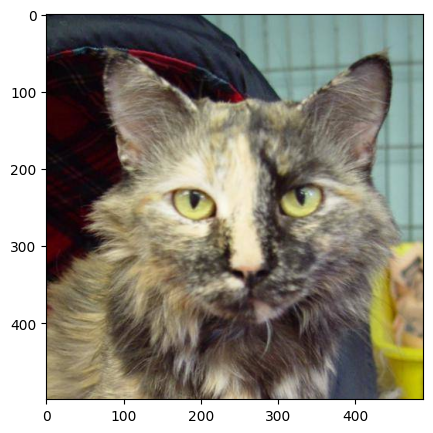

In [ ]:
plt.figure(figsize=(10,5))
imag1=r'/content/test/cats/cat.10.jpg'
#print(imread(imag1))
plt.imshow(imread(imag1))

# **Convert into matrics form**

In [ ]:

imag_path = r"/content/test/cats/cat.10.jpg"
img = imread(imag_path)
print(img)


[[[ 26  30  39]
  [ 24  28  37]
  [ 19  23  32]
  ...
  [126 158 155]
  [125 157 154]
  [125 157 154]]

 [[ 29  33  42]
  [ 29  33  42]
  [ 26  30  39]
  ...
  [126 158 155]
  [125 157 154]
  [124 156 153]]

 [[ 30  34  43]
  [ 34  38  47]
  [ 35  39  48]
  ...
  [127 159 156]
  [126 158 155]
  [124 156 153]]

 ...

 [[165 151 114]
  [163 149 110]
  [156 142 103]
  ...
  [175 170   6]
  [172 166   6]
  [166 160   2]]

 [[160 146 111]
  [159 145 108]
  [153 139 102]
  ...
  [175 171   2]
  [172 167   3]
  [166 161   0]]

 [[154 140 105]
  [154 140 103]
  [150 136  99]
  ...
  [175 171   2]
  [172 167   3]
  [166 161   0]]]


In [ ]:
img.shape

(499, 489, 3)

# **Resize Image:**

In [ ]:
img_resize=resize(img,(15,15))
img_resize.shape

(15, 15, 3)

# **Change into 1D matrics:**

In [ ]:
img_flatten=img_resize.flatten()
img_flatten

array([0.18899499, 0.21851844, 0.24646584, 0.18834705, 0.21624202,
       0.25087124, 0.17980343, 0.20488626, 0.24780225, 0.17690155,
       0.19364715, 0.24425269, 0.17605464, 0.19773799, 0.25355169,
       0.17912758, 0.20745818, 0.26214068, 0.25896329, 0.32219446,
       0.34850534, 0.4281602 , 0.54025488, 0.53145126, 0.49484492,
       0.62431482, 0.60349709, 0.51055701, 0.63821728, 0.61423483,
       0.51510678, 0.64045244, 0.62101727, 0.51530205, 0.64165612,
       0.62127309, 0.51804219, 0.64090488, 0.62729402, 0.51772444,
       0.64083429, 0.63218967, 0.51483207, 0.64125359, 0.62599575,
       0.1307041 , 0.1047313 , 0.13139967, 0.11979758, 0.10426501,
       0.13121124, 0.20325916, 0.18585747, 0.19682531, 0.28316295,
       0.21719309, 0.23292651, 0.22833732, 0.14048344, 0.18138866,
       0.17811282, 0.14057798, 0.19087125, 0.16858866, 0.18605672,
       0.23272624, 0.26200826, 0.31542572, 0.3413448 , 0.45883131,
       0.57300087, 0.55502869, 0.51943882, 0.64644922, 0.61802

In [ ]:
img_flatten.shape

(675,)

# **Extract Data from all images:**

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

input_dir = r'/content/dogs_vs_cats/train'
categories = ['cats', 'dogs']
data = []
label = []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img_resize = resize(img, (15, 15))  # Resize the image
        img_flatten = img_resize.flatten()
        data.append(img_flatten)
        label.append(category_idx)


Streaming output truncated to the last 5000 lines.
/content/dogs_vs_cats/train/dogs/dog.2345.jpg
/content/dogs_vs_cats/train/dogs/dog.4918.jpg
/content/dogs_vs_cats/train/dogs/dog.2794.jpg
/content/dogs_vs_cats/train/dogs/dog.10481.jpg
/content/dogs_vs_cats/train/dogs/dog.11400.jpg
/content/dogs_vs_cats/train/dogs/dog.11261.jpg
/content/dogs_vs_cats/train/dogs/dog.10258.jpg
/content/dogs_vs_cats/train/dogs/dog.10760.jpg
/content/dogs_vs_cats/train/dogs/dog.8764.jpg
/content/dogs_vs_cats/train/dogs/dog.4721.jpg
/content/dogs_vs_cats/train/dogs/dog.6233.jpg
/content/dogs_vs_cats/train/dogs/dog.8265.jpg
/content/dogs_vs_cats/train/dogs/dog.11060.jpg
/content/dogs_vs_cats/train/dogs/dog.2746.jpg
/content/dogs_vs_cats/train/dogs/dog.6054.jpg
/content/dogs_vs_cats/train/dogs/dog.11885.jpg
/content/dogs_vs_cats/train/dogs/dog.7415.jpg
/content/dogs_vs_cats/train/dogs/dog.2410.jpg
/content/dogs_vs_cats/train/dogs/dog.217.jpg
/content/dogs_vs_cats/train/dogs/dog.8114.jpg
/content/dogs_vs_cats/t

In [ ]:
data[1]

array([0.65714513, 0.53844073, 0.65141616, 0.66301413, 0.54545102,
       0.65526634, 0.6637385 , 0.55518061, 0.65892521, 0.65835446,
       0.55564638, 0.6562304 , 0.53435868, 0.4307827 , 0.52152381,
       0.35377024, 0.28850229, 0.34600457, 0.41625061, 0.3452916 ,
       0.42019674, 0.61884615, 0.50697078, 0.61040799, 0.6369866 ,
       0.52018622, 0.62832521, 0.63052766, 0.51343612, 0.62161499,
       0.54722053, 0.44819526, 0.5406266 , 0.42799884, 0.37628249,
       0.42413869, 0.52758334, 0.43843949, 0.52117277, 0.61064359,
       0.48837318, 0.59930888, 0.56680108, 0.4444526 , 0.55745245,
       0.67099384, 0.55444499, 0.66347654, 0.67698718, 0.5606683 ,
       0.66783661, 0.67880449, 0.57221064, 0.67315453, 0.66120295,
       0.56311784, 0.65718941, 0.48159405, 0.38284542, 0.45618856,
       0.30986683, 0.25214508, 0.28830645, 0.27182657, 0.23221421,
       0.2762986 , 0.4207323 , 0.35244431, 0.42391301, 0.47988918,
       0.39603067, 0.48026636, 0.48901377, 0.39808069, 0.48053

In [ ]:
label[1]

0

#**Convert data into 1D matrics:**

In [ ]:
data=np.array(data)
data

array([[0.28341755, 0.28809934, 0.25508374, ..., 0.59508869, 0.7123322 ,
        0.49886867],
       [0.87964127, 0.77892053, 0.69936958, ..., 0.93301363, 0.86919753,
        0.80669935],
       [0.1651381 , 0.17200304, 0.17231085, ..., 0.11913592, 0.15368061,
        0.22006411],
       ...,
       [0.38840115, 0.36339378, 0.3377584 , ..., 0.5432874 , 0.14526301,
        0.23303595],
       [0.55527997, 0.44196459, 0.37006045, ..., 0.75109804, 0.62251035,
        0.55477   ],
       [0.2989472 , 0.25851275, 0.28177977, ..., 0.27132572, 0.313399  ,
        0.37139724]])

In [ ]:
label=np.array(label)
label

array([0, 0, 0, ..., 1, 1, 1])

# **Split the data:**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test=train_test_split(data,label,test_size= 0.2 , shuffle=True, stratify=label)

# **Import model:**

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='poly')


# **Fit model:**

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='poly')

# **Prediction:**

In [ ]:
y_pred=model.predict(x_test)

# **Plot image using function:**

In [ ]:
import cv2  # Import the OpenCV library


def classify(img_path):
    print(img_path)
    img = imread(img_path)
    img_resize = resize(img, (15, 15))  # Resize the image
    img_flatten = img_resize.flatten()
    img_array = np.array(img_flatten)
    img_array = img_array.reshape(1, -1)  # Reshape the array
    result = model.predict(img_array)
    imge = cv2.imread(img_path)  # Use cv2.imread instead of cv.imread
    plt.imshow(imge)
    if result[0] == 1:
        print('result is ', result)
        return 'Hi baho baho i am a  Dog'
    else:
        return 'Given is Cat'




# **Testing Model:**

/content/dogs_vs_cats/test/cats/cat.10017.jpg


'Given is Cat'

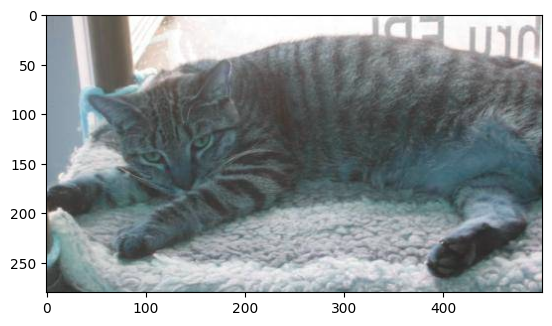

In [ ]:
imge1=r'/content/dogs_vs_cats/test/cats/cat.10017.jpg'
classify(imge1)

/content/dogs_vs_cats/test/dogs/dog.10014.jpg
result is  [1]


'Hi baho baho i am a  Dog'

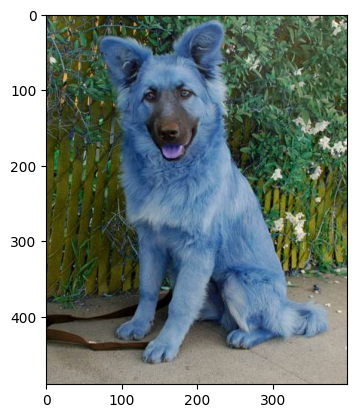

In [ ]:
imge2=r'/content/dogs_vs_cats/test/dogs/dog.10014.jpg'
classify(imge2)

/content/dogs_vs_cats/test/dogs/dog.10120.jpg
result is  [1]


'Hi baho baho i am a  Dog'

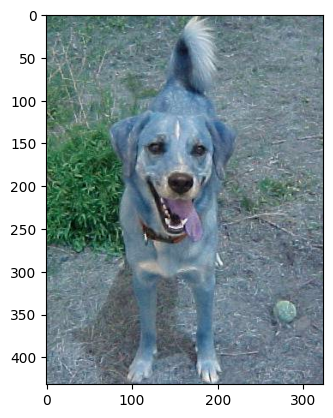

In [ ]:
imge3=r'/content/dogs_vs_cats/test/dogs/dog.10120.jpg'
classify(imge3)

/content/dogs_vs_cats/test/dogs/dog.10028.jpg
result is  [1]


'Hi baho baho i am a  Dog'

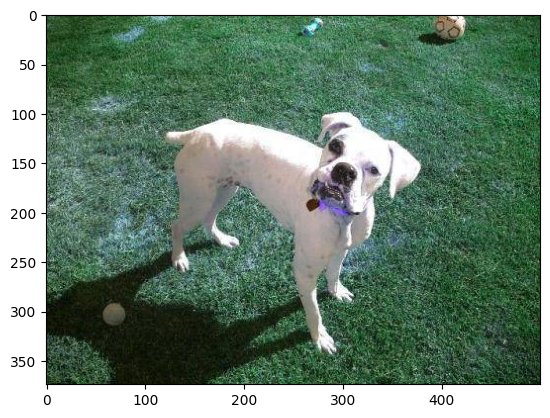

In [ ]:
imge3=r'/content/dogs_vs_cats/test/dogs/dog.10028.jpg'
classify(imge3)

/content/dogs_vs_cats/test/cats/cat.10086.jpg


'Given is Cat'

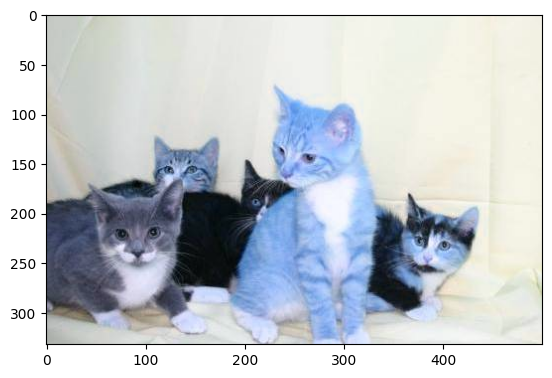

In [ ]:
imge7=r'/content/dogs_vs_cats/test/cats/cat.10086.jpg'
classify(imge7)

/content/dogs_vs_cats/test/cats/cat.1029.jpg


'Given is Cat'

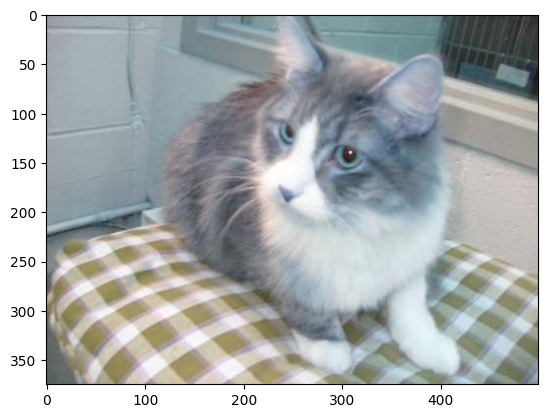

In [ ]:
imge6=r'/content/dogs_vs_cats/test/cats/cat.1029.jpg'
classify(imge6)


/content/dogs_vs_cats/test/cats/cat.10.jpg


'Given is Cat'

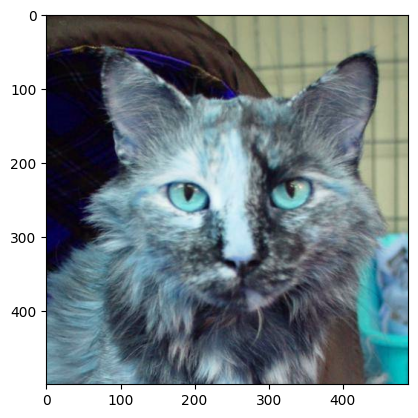

In [ ]:
imge6=r'/content/dogs_vs_cats/test/cats/cat.10.jpg'
classify(imge6)

/content/dogi.jpg
result is  [1]


'Hi baho baho i am a  Dog'

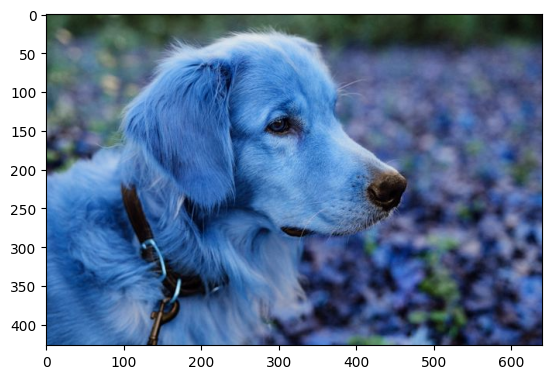

In [ ]:
imge8=r'/content/dogi.jpg'
classify(imge8)

/content/do.jpeg
result is  [1]


'Hi baho baho i am a  Dog'

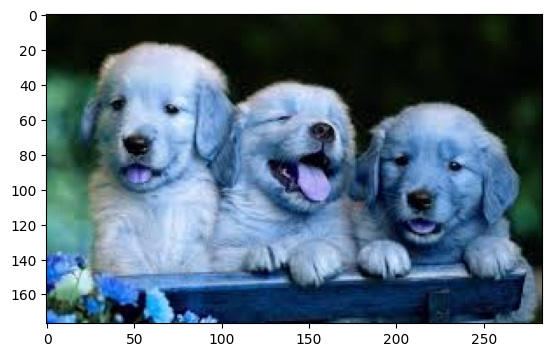

In [ ]:
imge9=r'/content/do.jpeg'
classify(imge9)

# **Thank You**